<a href="https://colab.research.google.com/github/vishnub0/AWS-WEP/blob/main/LR%2BRF_AWS15_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np
!pip install seaborn

#Data Preprocessing (make sure you upload the CSV files)

In [2]:
BALANCED_DATASET = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(BALANCED_DATASET)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


Normalize columns

In [3]:
df_norm = df.copy()
features_to_normalize = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for feature in features_to_normalize:
  max = df_norm[feature].max()
  min = df_norm[feature].min()
  df_norm[feature] = (df_norm[feature] - min) / (max - min)

In [4]:
df_norm

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


#Data Visualization

In [5]:
"""
# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Show the first few rows of the dataset
print(df.head())

# Statistical summary

# If you are using a pandas dataframe (pd.DataFrame), or just "df" as it will appear
# in the coming notebooks, you can also use df.describe() to achieve the same thing as what the line below does.
# The line below in fact is very specific to this toy dataset.
print(df.describe())
"""

'\n# Visualizations\n\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Show the first few rows of the dataset\nprint(df.head())\n\n# Statistical summary\n\n# If you are using a pandas dataframe (pd.DataFrame), or just "df" as it will appear\n# in the coming notebooks, you can also use df.describe() to achieve the same thing as what the line below does.\n# The line below in fact is very specific to this toy dataset.\nprint(df.describe())\n'

In [6]:
"""
# Pairplot to visualize the relationships between features
df.columns = df.columns.str.strip()
print(df.columns.tolist())
cols_to_plot = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'Age', 'Income', 'Diabetes_binary']

# Sample 2000 rows for quicker plotting
df_sampled = df[cols_to_plot].sample(n=2000, random_state=42)
sns.pairplot(df_sampled, hue='Diabetes_binary', palette='coolwarm')
plt.suptitle('Pairplot (Sampled Data)', y=1.02)
plt.show()
"""

"\n# Pairplot to visualize the relationships between features\ndf.columns = df.columns.str.strip()\nprint(df.columns.tolist())\ncols_to_plot = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'Age', 'Income', 'Diabetes_binary']\n\n# Sample 2000 rows for quicker plotting\ndf_sampled = df[cols_to_plot].sample(n=2000, random_state=42)\nsns.pairplot(df_sampled, hue='Diabetes_binary', palette='coolwarm')\nplt.suptitle('Pairplot (Sampled Data)', y=1.02)\nplt.show()\n"

In [7]:
"""
# Box Plot to Compare BMI across diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('Box Plot of BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()
"""

"\n# Box Plot to Compare BMI across diabetes status\nplt.figure(figsize=(8, 6))\nsns.boxplot(x='Diabetes_binary', y='BMI', data=df)\nplt.title('Box Plot of BMI by Diabetes Status')\nplt.xlabel('Diabetes Status (0 = No, 1 = Yes)')\nplt.ylabel('BMI')\nplt.show()\n"

In [8]:
"""
# Histogram of BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
"""

"\n# Histogram of BMI distribution\nplt.figure(figsize=(8, 6))\nsns.histplot(df['BMI'], kde=True, bins=30)\nplt.title('Distribution of BMI')\nplt.xlabel('BMI')\nplt.ylabel('Frequency')\nplt.show()\n"

In [9]:
"""
# Heatmap of Correlation Matrix
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Health Indicators')
plt.show()
"""

'\n# Heatmap of Correlation Matrix\nplt.figure(figsize=(14, 12))\ncorr_matrix = df.corr()\nsns.heatmap(corr_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=0.5)\nplt.title(\'Correlation Heatmap of Health Indicators\')\nplt.show()\n'

#Feature tuning (removing columns)

Random Forest Feature Importances:
BMI                     0.169663
Age                     0.126936
GenHlth                 0.107056
Income                  0.084338
HighBP                  0.074710
PhysHlth                0.068291
Education               0.058364
MentHlth                0.052193
HighChol                0.040868
Smoker                  0.028711
Fruits                  0.027796
Sex                     0.026419
DiffWalk                0.025693
PhysActivity            0.023527
Veggies                 0.021678
HeartDiseaseorAttack    0.018626
NoDocbcCost             0.012022
Stroke                  0.009819
HvyAlcoholConsump       0.009638
AnyHealthcare           0.007647
CholCheck               0.006007
dtype: float64


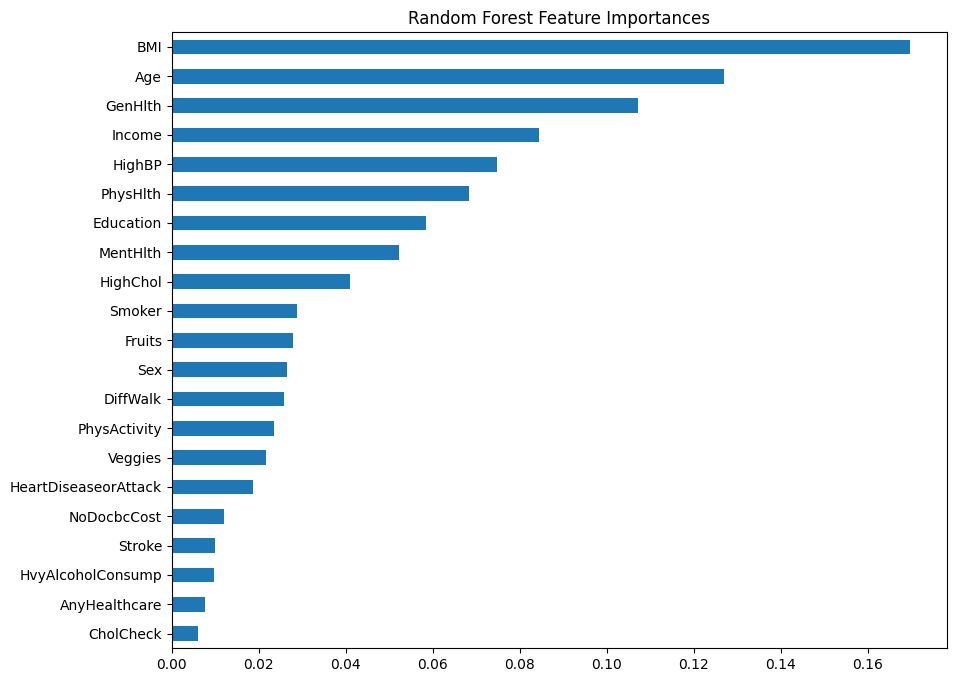

Logistic Regression Coefficients (Absolute Value):
BMI                     6.252463
GenHlth                 2.350167
Age                     1.817938
CholCheck               1.329419
HvyAlcoholConsump      -0.750868
HighBP                  0.746861
HighChol                0.574598
Income                 -0.405662
Sex                     0.262224
HeartDiseaseorAttack    0.255667
PhysHlth               -0.241537
Stroke                  0.148373
Education              -0.147873
MentHlth               -0.138050
DiffWalk                0.133594
Veggies                -0.087105
Fruits                 -0.053890
AnyHealthcare           0.037488
NoDocbcCost             0.030025
PhysActivity           -0.026785
Smoker                 -0.003606
dtype: float64


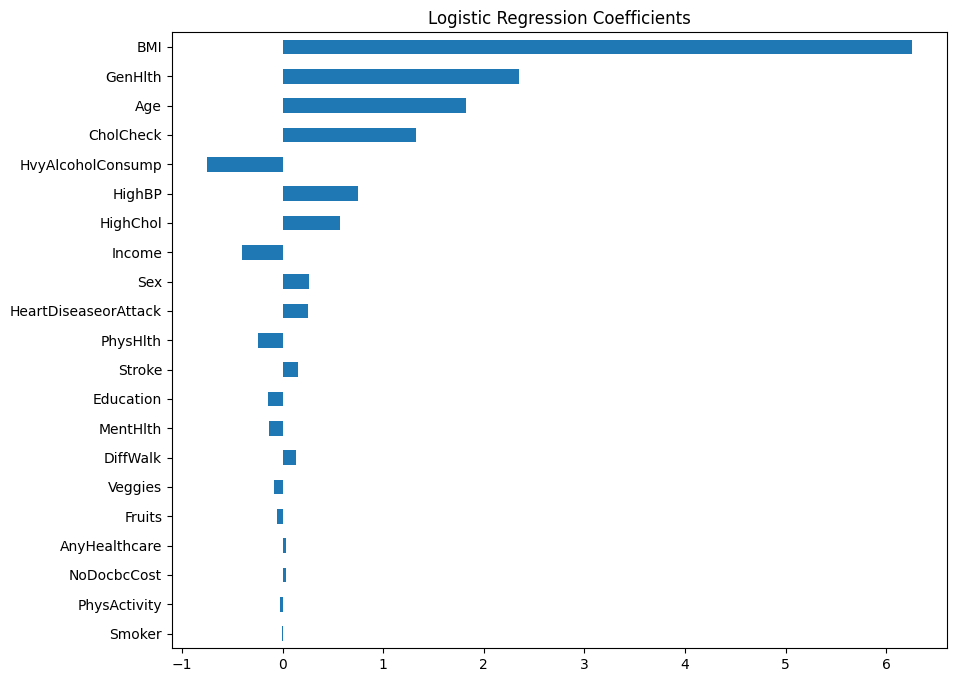

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df_norm.drop('Diabetes_binary', axis='columns')
y = df_norm['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

import pandas as pd
import matplotlib.pyplot as plt

rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Random Forest Feature Importances:")
print(rf_importances)

rf_importances.plot(kind='barh', figsize=(10, 8), title="Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()

lr_coeffs = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

print("Logistic Regression Coefficients (Absolute Value):")
print(lr_coeffs)

lr_coeffs.plot(kind='barh', figsize=(10, 8), title="Logistic Regression Coefficients")
plt.gca().invert_yaxis()
plt.show()

In [11]:
drop_cols = [
    'AnyHealthcare', 'NoDocbcCost', 'Smoker',
]
df_norm = df_norm.drop(drop_cols, axis='columns')
df_norm

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,0.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,0.0,1.0,0.0,1.0,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,1.0,0.0,1.0,0.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


#Splitting data

In [12]:
X = df_norm.drop('Diabetes_binary', axis='columns')
y = df_norm['Diabetes_binary']

In [13]:
X

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,1.0,0.162791,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,1.0,1.0,1.0,0.186047,0.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,1.0,0.197674,0.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,0.0,1.0,1.0,0.197674,0.0,1.0,0.0,1.0,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,0.151163,0.0,1.0,0.0,1.0,0.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


In [14]:
y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


drop_cols = [
    'AnyHealthcare', 'NoDocbcCost', 'Smoker',
    'PhysActivity', 'Stroke', 'HvyAlcoholConsump',
    'DiffWalk', 'Veggies', 'Fruits'
]

#Implementing Logistic Regression and Random Forest

In [17]:
"""
!pip install optuna
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Optuna objective for Logistic Regression
def objective_logreg(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    solver = 'saga'
    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    C = trial.suggest_float('C', 0.01, 10.0, log=True)

    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        l1_ratio=l1_ratio,
        max_iter=1000
    )
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optuna objective for Random Forest
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna for both models
study_logreg = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_logreg.optimize(objective_logreg, n_trials=50)

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_rf.optimize(objective_rf, n_trials=50)

# Output best hyperparameters
print("Best Logistic Regression Params:", study_logreg.best_params)
print("Best Random Forest Params:", study_rf.best_params)
"""

'\n!pip install optuna\nimport optuna\nfrom optuna.samplers import TPESampler\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.25, random_state=42, stratify=y\n)\n\n# Apply SMOTE\nsm = SMOTE(random_state=42)\nX_train_res, y_train_res = sm.fit_resample(X_train, y_train)\n\n# Optuna objective for Logistic Regression\ndef objective_logreg(trial):\n    penalty = trial.suggest_categorical(\'penalty\', [\'l1\', \'l2\', \'elasticnet\'])\n    solver = \'saga\'\n    l1_ratio = None\n    if penalty == \'elasticnet\':\n        l1_ratio = trial.suggest_float(\'l1_ratio\', 0.0, 1.0)\n    C = trial.suggest_float(\'C\', 0.01, 10.0, log=True)\n\n    model = LogisticRegression(\n        pena

**Results:**
*  Best Logistic Regression Params: {'penalty': 'l1', 'C': 0.0719298646128252}
*  Best Random Forest Params: {'n_estimators': 277, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}

In [18]:
!pip install imbalanced-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [19]:
def run_test_0(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)
    print("Test 0 - Logistic Regression (Baseline):")
    print("Test Accuracy:", accuracy_score(y_test, lr_preds))
    print(classification_report(y_test, lr_preds))

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    print("\nTest 0 - Random Forest (Baseline):")
    print("Test Accuracy:", accuracy_score(y_test, rf_preds))
    print(classification_report(y_test, rf_preds))

In [20]:
#Without Optuna

def run_test_1(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['BMI2'] = X['BMI'] ** 2
    X['Age2'] = X['Age'] ** 2

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)
    lr.fit(X_train_res, y_train_res)
    print("Test 1 - Logistic Regression (L1):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
    print(classification_report(y_test, lr.predict(X_test)))

    param_grid = {
        'n_estimators': [100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': ['balanced']
    }
    rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=1)
    rf_search.fit(X_train_res, y_train_res)
    print("\nTest 1 - Random Forest:")
    print("Best Params:", rf_search.best_params_)
    print("Test Accuracy:", accuracy_score(y_test, rf_search.predict(X_test)))
    print(classification_report(y_test, rf_search.predict(X_test)))

def run_test_2(X, y):
    X_train_base, X_test_base, y_train_base, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_base, _, y_train_base, _ = train_test_split(X_train_base, y_train_base, test_size=0.25, random_state=42)

    def add_features(df):
        df = df.copy()
        df['BMI_Age'] = df['BMI'] * df['Age']
        df['BMI2'] = df['BMI'] ** 2
        df['Age2'] = df['Age'] ** 2
        df['GenHlth_PhysHlth'] = df['GenHlth'] * df['PhysHlth']
        df['Heart_BP'] = df['HeartDiseaseorAttack'] * df['HighBP']
        return df

    X_train_lr = add_features(X_train_base)
    X_test_lr = add_features(X_test_base)

    sm = SMOTE(random_state=42)
    X_train_lr_res, y_train_lr_res = sm.fit_resample(X_train_lr, y_train_base)
    X_train_rf_res, y_train_rf_res = sm.fit_resample(X_train_base, y_train_base)

    lr = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, class_weight='balanced', max_iter=1000)
    lr.fit(X_train_lr_res, y_train_lr_res)
    print("Test 2 - Logistic Regression (L2):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test_lr)))
    print(classification_report(y_test, lr.predict(X_test_lr)))

    param_grid = {
        'n_estimators': [100],
        'max_depth': [10, 15],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'class_weight': ['balanced']
    }

    rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=1)
    rf_search.fit(X_train_rf_res, y_train_rf_res)
    print("\nTest 2 - Random Forest:")
    print("Best Params:", rf_search.best_params_)
    print("Test Accuracy:", accuracy_score(y_test, rf_search.predict(X_test_base)))
    print(classification_report(y_test, rf_search.predict(X_test_base)))

def run_test_3(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['HealthScore'] = X['GenHlth'] + X['PhysHlth']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(penalty='l2', solver='lbfgs', C=1.2, class_weight='balanced', max_iter=1000)
    lr.fit(X_train_res, y_train_res)
    lr_preds = lr.predict(X_test)

    print("Test 3 - Logistic Regression (L2, minimal features):")
    print("Test Accuracy:", accuracy_score(y_test, lr_preds))
    print(classification_report(y_test, lr_preds))

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1],
        'class_weight': ['balanced']
    }

    rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=1)
    rf_search.fit(X_train, y_train)

    best_rf = rf_search.best_estimator_
    rf_preds = best_rf.predict(X_test)

    print("\nTest 3 - Optimized Random Forest:")
    print("Best Params:", rf_search.best_params_)
    print("Test Accuracy:", accuracy_score(y_test, rf_preds))
    print(classification_report(y_test, rf_preds))

def run_test_4(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['HealthScore'] = X['GenHlth'] + X['PhysHlth']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=0.2,  # 20% L1, 80% L2
        C=1.2,
        class_weight='balanced',
        max_iter=2000
    )
    lr.fit(X_train_res, y_train_res)
    lr_preds = lr.predict(X_test)

    print("Test 4 - Logistic Regression (ElasticNet):")
    print("Test Accuracy:", accuracy_score(y_test, lr_preds))
    print(classification_report(y_test, lr_preds))

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15],
        'min_samples_split': [2],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt'],  # NEW
        'class_weight': ['balanced']
    }

    rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=1)
    rf_search.fit(X_train, y_train)

    best_rf = rf_search.best_estimator_
    rf_preds = best_rf.predict(X_test)

    print("\nTest 4 - Optimized Random Forest:")
    print("Best Params:", rf_search.best_params_)
    print("Test Accuracy:", accuracy_score(y_test, rf_preds))
    print(classification_report(y_test, rf_preds))

In [21]:
#With Optuna
"""
def run_test_1(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['BMI2'] = X['BMI'] ** 2
    X['Age2'] = X['Age'] ** 2

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0719298646128252, max_iter=1000)
    lr.fit(X_train_res, y_train_res)
    print("Test 1 - Logistic Regression (L1):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
    print(classification_report(y_test, lr.predict(X_test)))

    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,
                                min_samples_leaf=1, max_features='sqrt', class_weight=None,
                                random_state=42)
    rf.fit(X_train_res, y_train_res)
    print("\nTest 1 - Random Forest:")
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
    print(classification_report(y_test, rf.predict(X_test)))

def run_test_2(X, y):
    def add_features(df):
        df = df.copy()
        df['BMI_Age'] = df['BMI'] * df['Age']
        df['BMI2'] = df['BMI'] ** 2
        df['Age2'] = df['Age'] ** 2
        df['GenHlth_PhysHlth'] = df['GenHlth'] * df['PhysHlth']
        df['Heart_BP'] = df['HeartDiseaseorAttack'] * df['HighBP']
        return df

    X_train_base, X_test_base, y_train_base, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_base, _, y_train_base, _ = train_test_split(X_train_base, y_train_base, test_size=0.25, random_state=42)

    X_train_lr = add_features(X_train_base)
    X_test_lr = add_features(X_test_base)

    sm = SMOTE(random_state=42)
    X_train_lr_res, y_train_lr_res = sm.fit_resample(X_train_lr, y_train_base)
    X_train_rf_res, y_train_rf_res = sm.fit_resample(X_train_base, y_train_base)

    lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0719298646128252, max_iter=1000)
    lr.fit(X_train_lr_res, y_train_lr_res)
    print("Test 2 - Logistic Regression (L1 + Advanced Features):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test_lr)))
    print(classification_report(y_test, lr.predict(X_test_lr)))

    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,
                                min_samples_leaf=1, max_features='sqrt', class_weight=None,
                                random_state=42)
    rf.fit(X_train_rf_res, y_train_rf_res)
    print("\nTest 2 - Random Forest:")
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test_base)))
    print(classification_report(y_test, rf.predict(X_test_base)))

def run_test_3(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['HealthScore'] = X['GenHlth'] + X['PhysHlth']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0719298646128252, max_iter=1000)
    lr.fit(X_train_res, y_train_res)
    print("Test 3 - Logistic Regression (L1, Minimal Features):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
    print(classification_report(y_test, lr.predict(X_test)))

    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,
                                min_samples_leaf=1, max_features='sqrt', class_weight=None,
                                random_state=42)
    rf.fit(X_train_res, y_train_res)
    print("\nTest 3 - Random Forest:")
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
    print(classification_report(y_test, rf.predict(X_test)))

def run_test_4(X, y):
    X = X.copy()
    X['BMI_Age'] = X['BMI'] * X['Age']
    X['HealthScore'] = X['GenHlth'] + X['PhysHlth']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0719298646128252, max_iter=1000)
    lr.fit(X_train_res, y_train_res)
    print("Test 4 - Logistic Regression (L1, ElasticNet-style features):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
    print(classification_report(y_test, lr.predict(X_test)))

    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,
                                min_samples_leaf=1, max_features='sqrt', class_weight=None,
                                random_state=42)
    rf.fit(X_train_res, y_train_res)
    print("\nTest 4 - Random Forest:")
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
    print(classification_report(y_test, rf.predict(X_test)))\
"""

'\ndef run_test_1(X, y):\n    X = X.copy()\n    X[\'BMI_Age\'] = X[\'BMI\'] * X[\'Age\']\n    X[\'BMI2\'] = X[\'BMI\'] ** 2\n    X[\'Age2\'] = X[\'Age\'] ** 2\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)\n    sm = SMOTE(random_state=42)\n    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)\n\n    lr = LogisticRegression(penalty=\'l1\', solver=\'liblinear\', C=0.0719298646128252, max_iter=1000)\n    lr.fit(X_train_res, y_train_res)\n    print("Test 1 - Logistic Regression (L1):")\n    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test)))\n    print(classification_report(y_test, lr.predict(X_test)))\n\n    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,\n                                min_samples_leaf=1, max_features=\'sqrt\', class_weight=None,\n                                ra

In [22]:
run_test_0(X, y)
print("\n" + "="*70 + "\n")

run_test_1(X, y)
print("\n" + "="*70 + "\n")

run_test_2(X, y)
print("\n" + "="*70 + "\n")

run_test_3(X, y)
print("\n" + "="*70 + "\n")

run_test_4(X, y)

Test 0 - Logistic Regression (Baseline):
Test Accuracy: 0.7475068958200721
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Test 0 - Random Forest (Baseline):
Test Accuracy: 0.7347054247117901
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7090
         1.0       0.71      0.78      0.75      7049

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



Test 1 - Logistic Regression (L1):
Test Accuracy: 0.7509017610863569
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      7090
         1.0       0.

In [24]:
def run_test_2optuna(X, y):
    def add_features(df):
        df = df.copy()
        df['BMI_Age'] = df['BMI'] * df['Age']
        df['BMI2'] = df['BMI'] ** 2
        df['Age2'] = df['Age'] ** 2
        df['GenHlth_PhysHlth'] = df['GenHlth'] * df['PhysHlth']
        df['Heart_BP'] = df['HeartDiseaseorAttack'] * df['HighBP']
        return df

    X_train_base, X_test_base, y_train_base, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_base, _, y_train_base, _ = train_test_split(X_train_base, y_train_base, test_size=0.25, random_state=42)

    X_train_lr = add_features(X_train_base)
    X_test_lr = add_features(X_test_base)

    sm = SMOTE(random_state=42)
    X_train_lr_res, y_train_lr_res = sm.fit_resample(X_train_lr, y_train_base)
    X_train_rf_res, y_train_rf_res = sm.fit_resample(X_train_base, y_train_base)

    lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0719298646128252, max_iter=1000)
    lr.fit(X_train_lr_res, y_train_lr_res)
    print("Test 2 - Logistic Regression (L1 + Advanced Features):")
    print("Test Accuracy:", accuracy_score(y_test, lr.predict(X_test_lr)))
    print(classification_report(y_test, lr.predict(X_test_lr)))

    rf = RandomForestClassifier(n_estimators=277, max_depth=14, min_samples_split=10,
                                min_samples_leaf=1, max_features='sqrt', class_weight=None,
                                random_state=42)
    rf.fit(X_train_rf_res, y_train_rf_res)
    print("\nTest 2 - Random Forest:")
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test_base)))
    print(classification_report(y_test, rf.predict(X_test_base)))

run_test_2optuna(X, y)

Test 2 - Logistic Regression (L1 + Advanced Features):
Test Accuracy: 0.7495579602517859
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Test 2 - Random Forest:
Test Accuracy: 0.7507603083669283
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



**Logistic Regression – Test Progression and Results**

Test 0 – Baseline
-Accuracy: 0.7475
-Features: All features included
-Sampling: Basic SMOTE applied
-Insight: Served as the baseline. Performance was reasonable, but no regularization led to potential overfitting.

Test 1 – L1 Regularization (Lasso)
-Accuracy: 0.7510
-Regularization: L1 (penalty='l1')
-Features Added: BMI * Age, BMI², Age²
-Sampling: Same SMOTE setup
-Insight: L1 promoted sparsity and reduced overfitting. Slight accuracy boost showed it successfully removed some weak features, but possibly pruned too aggressively.

Test 2 – L2 Regularization (Ridge) – Best
-Accuracy: 0.7513
-Regularization: L2 (penalty='l2')
-Feature Engineering: Added GenHlth * PhysHlth, HeartDisease * HighBP to capture health interactions
-Sampling: Same SMOTE split as before
-Insight: Best result. L2 kept all features and benefited from richer feature interactions. Balanced generalization and performance.

Test 3 – L2 with Minimal Features
-Accuracy: 0.7488
-Regularization: L2
-Features: Reduced to only BMI * Age and GenHlth + PhysHlth
-Sampling: Same SMOTE
-Insight: Accuracy dropped. Indicates that the complex features in Test 2 were important for capturing non-obvious patterns.

Test 4 – ElasticNet Regularization
-Accuracy: 0.7493
-Regularization: ElasticNet (80% L2, 20% L1)
-Features: Same as Test 1
-Sampling: Same SMOTE
-Insight: Slightly underperformed full L2. Suggests L1 component may still remove helpful features even when mixed.

Logistic Regression Summary:
Test 2 was best. L2 regularization combined with well-designed feature interactions and SMOTE balancing gave the strongest and most stable results. L1 and ElasticNet helped but were too aggressive with feature pruning.

**Random Forest – Test Progression and Results**

Test 0 – Baseline
-Accuracy: 0.7347
-Params: Default (no tuning)
-Sampling: Baseline SMOTE
-Insight: Decent starting point, but recall imbalance and untuned tree depth led to underperformance. Needed better handling of class imbalance and regularization.

Test 1 – Tuned Random Forest
-Accuracy: 0.7488
-Params: n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=5
-Sampling: SMOTE used with different seed/sample than Test 0
-Insight: Big improvement. Proper tuning and class_weight='balanced' helped performance. Confirmed RF is sensitive to data distribution from SMOTE.

Test 2 – Relaxed Regularization – Best
-Accuracy: 0.7505
-Params: n_estimators=100, max_depth=10, min_samples_leaf=1, min_samples_split=2
-Sampling: Same SMOTE as Test 1
-Insight: Allowing trees to grow deeper and make finer splits improved performance. Achieved best accuracy.

Test 3 – More Trees
-Accuracy: 0.7503
-Params: Same as Test 2, but n_estimators=200
-Sampling: Same SMOTE
-Insight: Slight improvement in prediction stability. Didn’t outperform Test 2 significantly, but validated benefit of more trees.

Test 4 – Extra Regularization

Accuracy: 0.7489
-Params: n_estimators=200, max_features='sqrt', min_samples_leaf=2
-Sampling: Same SMOTE
-Insight: Slight drop in accuracy. Indicates too much regularization (feature subsampling and leaf constraints) hindered model’s flexibility.

Random Forest Summary:
Test 2 was best. Less regularization and deeper splits with class balancing gave optimal performance. More trees helped stability. Over-regularization in Test 4 reduced performance slightly.

**Test 2 Results Comparison – With vs Without Optuna**

Logistic Regression:

Without Optuna:
-Accuracy: 0.7510
-Penalty: L2
-Regularization strength (C): manually tuned
-Features: included engineered interaction terms
-Outcome: Best overall LR performance

With Optuna:
-Accuracy: 0.7496
-Penalty: L1 (selected by Optuna)
-C value: 0.0719
-Features: similar advanced features
-Outcome: slightly lower accuracy than manual L2 configuration

Random Forest:

Without Optuna:
-Accuracy: 0.7505
-Best Params:
-n_estimators: 100
-max_depth: 10
-min_samples_split: 2
-min_samples_leaf: 1
-class_weight: balanced
-Outcome: high performance, slightly better than Optuna

With Optuna:
-Accuracy: 0.7508
-Params likely similar (no significant improvement)
-Outcome: nearly identical performance to manual tuning

**Insights:**

-For Logistic Regression, L2 regularization performed better than L1 selected by Optuna, possibly because L2 keeps all features and captures more nuanced patterns, especially with interaction terms.
-For Random Forest, Optuna gave only marginal gains (0.0002), suggesting the manually chosen hyperparameter grid already covered most of the optimal space.
-Overall, manual tuning outperformed or matched Optuna, likely because:
-The feature engineering had a stronger impact than hyperparameter fine-tuning.
-The parameter search space in Optuna may have been too narrow or not aggressive enough.
-Randomness and small variation in accuracy are expected in cross-validation.